# The detailed demonstration of the tropical rainfall diagnostic for ICON data: 
# Graphical representation of the histograms 

### Content


1. [The load of packages, modules, and data](#1-load-of-packages-modules-and-data)

2. [Calculation of histogram of precipitation/tropical precipitation](#2-calculation-of-histogram-of-precipitationtropicalprecipitation)

3. [Graphical representation of the histograms](#4-histograms-of-tropical-precipitationn)

    3.1 [Different styles of plots](#41-different-styles-of-plots)

    3.1.1 [Histogram of counts with a smooth line style](#311-histogram-of-counts-with-a-smooth-linestyle-smooth--true)

    3.1.2 [Histogram of counts with a step line style](#312-histogram-of-counts-with-a-step-linestyle-step--true)

    3.1.3.[Histogram of pdf with a `viridis` color map](#313-histogram-of-pdf-with-a-viridis-color-map-color_map--true)
        
    3.1.4. [Histogram of pdf with any color map](#314-histogram-of-pdf-with-a-any-color-map-color_map--gist_heat)

    3.2  [ Saving the figure to the storage](#32-saving-the-figure-to-the-storage)

    3.3 [ Plotting the histogram of the counts, frequency, and pdf](#33-plotting-the-histogram-of-counts-frequency-and-pdf)


[Go to the end of file](#the-end)

#

## 1. The load of packages, modules, and data

In [1]:
import sys
from aqua import Reader
sys.path.insert(0, '../../../')
from tropical_rainfall import Tropical_Rainfall

Running tropical rainfall diagnostic...
Reading configuration yaml file..


In [3]:
diag = Tropical_Rainfall()

In [4]:
if diag.tools.get_machine()=='lumi':
    reader = Reader(model="IFS", exp="historical-1990-devcon", source="lra-r100-monthly") 
    ifs_1990_devcon = reader.retrieve(var=["tprate"])
    reader = Reader(model="IFS", exp="control-1950-devcon", source="lra-r100-monthly")
    control_1950_devcon = reader.retrieve(var=["tprate"])
else:
    reader = Reader(model="IFS", exp="tco2559-ng5-cycle3", source="lra-r100-monthly")
    ifs_tco2559_ng5 = reader.retrieve(var=["tprate"])
    reader = Reader(model="IFS", exp="tco1279-orca025-cycle3", source="lra-r100-monthly")
    ifs_tco1279_orca025 = reader.retrieve(var=["tprate"])


if diag.tools.get_machine()=='lumi':
    lra_data = {'historical_1990': {'data': ifs_1990_devcon, 'label': 'ifs_historical-1990-devcon'},
                'control_1950': {'data': control_1950_devcon, 'label': 'ifs_control-1950-devcon'}}
else:
    lra_data = {'ifs_tco2559': {'data': ifs_tco2559_ng5, 'label': 'ifs_tco2559'},
                'ifs_tco1279': {'data': ifs_tco1279_orca025, 'label': 'ifs_tco1279'}}

2023-11-09 18:02:34 :: Reader :: WARNING  -> You are asking for var ['tprate'] which is already fixed from ['tp'].
2023-11-09 18:02:34 :: Reader :: WARNING  -> It would be safer to run with fix=False
2023-11-09 18:02:34 :: Reader :: WARNING  -> You are asking for var ['tprate'] which is already fixed from ['tp'].
2023-11-09 18:02:34 :: Reader :: WARNING  -> Would be safer to run with fix=False
2023-11-09 18:02:34 :: eccodes :: WARNING  -> ShortName tprate have multiple grib codes associated: ['260048', '172228']
2023-11-09 18:02:34 :: eccodes :: WARNING  -> AQUA will take the first so that tprate -> 260048, please set up a correct fix if this does not look right
2023-11-09 18:02:40 :: Reader :: WARNING  -> You are asking for var ['tprate'] which is already fixed from ['tp'].
2023-11-09 18:02:40 :: Reader :: WARNING  -> It would be safer to run with fix=False
2023-11-09 18:02:40 :: Reader :: WARNING  -> You are asking for var ['tprate'] which is already fixed from ['tp'].
2023-11-09 18:

## 2. Calculation of histogram of tropical precipitation


##### Initializing the class object with the following attributes: 
 - `num_of_bins`
 - `first_edge`
 - `width_of_bin`

####  The tropical latitude band, by default, is the following

In [5]:
diag.trop_lat

10

In [17]:
histograms = {}
for key, value in lra_data.items():
    histograms[key] = {}
    histograms[key]["data"] = diag.histogram(value["data"])
    histograms[key]["label"] = value["label"]
histograms = diag.tools.add_colors_to_dict(loaded_dict=histograms)

2023-11-09 18:09:29 :: Trop. Rainfall :: WARNING  -> Amount of counts in the histogram is not equal to the size of the data
2023-11-09 18:09:29 :: Trop. Rainfall :: WARNING  -> Check the data and the bins


#### Initialization of diagnostic with a log spaced bins

In [20]:
bins = [8.639980646443353e-05, 0.00014151369955331302, 0.00023178439792294868, 0.0003796382059944186,
        0.0006218070286242559, 0.0010184538149834545, 0.0016681191021332112, 0.0027322017781080173,
        0.004475056099394337, 0.007329666220267666, 0.012005214141920321, 0.01966326478948687,
        0.03220633759860378, 0.052750557710750726, 0.08639980646443352]

In [21]:
diag = Tropical_Rainfall(bins=bins)

In [27]:
histograms_logspaced = {}
for key, value in lra_data.items():
    histograms_logspaced[key]={}
    histograms_logspaced[key]["data"] = diag.histogram_lowres(value["data"])
    histograms_logspaced[key]["label"] = value["label"]
histograms_logspaced = diag.tools.add_colors_to_dict(loaded_dict=histograms_logspaced)
    

/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua_common/lib/python3.11/site-packages/dask/array/core.py:3475: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(
2023-11-09 18:12:43 :: Trop. Rainfall :: WARNING  -> Amount of counts in the histogram is not equal to the size of the data
2023-11-09 18:12:43 :: Trop. Rainfall :: WARNING  -> The difference between the mean of the data and the mean of the histogram is greater than the threshold. 
                                 Increase the number of bins and decrease the width of the bins.
/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua_common/lib/python3.11/site-packages/dask/array/core.py:3475: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(
2023-11-09 18:12:44 :: Trop. Rainfall :: WARNING  -> Amount of counts in the histogram is not equal 

#

## 3. Plotting the histograms of tropical precipitation

### The function `histogram_plot` has a big set of arguments.

#### The first and major group of arguments relates to the histogram type: 

* `pdf`-histogram: `pdf=True`, also it is default value, 

* `frequency`-histogram: `frequency=True, pdf=False`,

* `counts`-histogram: `frequency=False, pdf=False`.

#### The second group of arguments related to the plot style:


* `smooth` (bool, True by default):     if True, smooth 2D line

* `step` (bool, False by default):      if True, step line 

* `color_map` (bool/str, False/'viridis' by default):   if not False, color map plot

#### The third set of arguments involves the figure settings:

* `ls` (str, '-'):              The line style for the plot. 

* `ylogscale` (bool, True):     The logarithmic scale for the y-axis. 

* `xlogscale` (bool, False):    The logarithmic scale for the x-axis. 

* `color` (str, 'tab:blue'):    The color of the plot. 
            
* `figsize` (float, 1):         The size of the figure. 

* `legend` (str, '_Hidden'):    The legend label for the plot. 

* `varname` (str, 'Precipitation'):    The name of the variable for the x-axis label. 

* `plot_title` (str, None):     The title of the plot.
            
* `loc` (str, 'upper right'):   The location of the legend. 

* `add/fig` (tuple, None):      Tuple of (fig, ax) to add the plot to an existing figure. / The figure object to plot on.

* `path_to_figure` (str, None): The path to save the figure. If provided, saves the figure at the specified path.

### 3.1 Different styles of the plots

##### 3.1.1 Histogram of counts with a `smooth` line style (`smooth = True`)

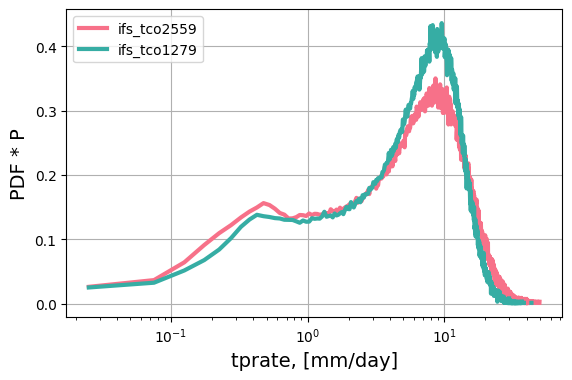

In [18]:
add = None
for key, value in histograms.items():
    add = diag.histogram_plot(value["data"],   add=add, pdfP = True, pdf=False, save=False,
                              figsize=0.8, xlogscale=True, ylogscale=False, color=value["color"], 
                              loc = 'upper left',
                              name_of_file= 'lra_comparison', legend=value["label"])

##### 3.1.2 Histogram of counts with a `step` line style (`step = True`)

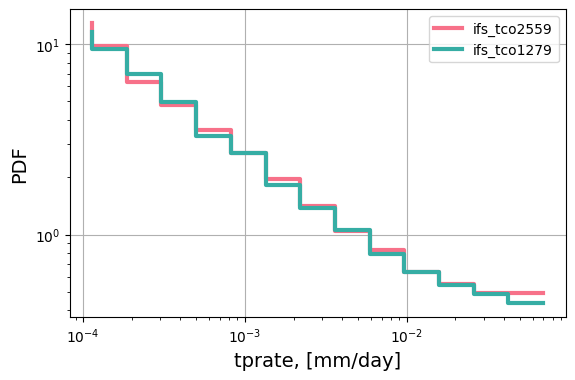

In [28]:
add = None
for key, value in histograms_logspaced.items():
    add = diag.histogram_plot(value["data"],   add=add, pdf=True, smooth=False, step = True, figsize=0.8, 
                              xlogscale = True, ylogscale=True, save=False, color=value["color"], 
                              loc = 'upper right',
                              name_of_file= 'lra_comparison', legend=value["label"])

##### 3.1.3 Histogram of pdf with a `viridis` color map (`color_map = True`)

{<Axes: title={'center': 'ifs_tco2559'}, xlabel='tprate, [mm/day]', ylabel='PDF'>,
 <Figure size 640x400 with 1 Axes>}

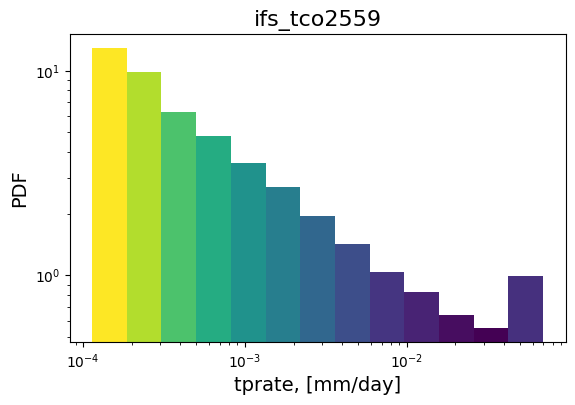

In [29]:
dataset='ifs_tco2559'
diag.histogram_plot(histograms_logspaced[dataset]['data'], smooth = False, color_map = True, figsize=0.8, 
                    xlogscale = True, ylogscale=True,  plot_title = histograms_logspaced[dataset]['label'])

##### 3.1.4 Histogram of pdf with any color map (`color_map = 'BrBG'`)

{<Axes: title={'center': 'ifs_tco2559'}, xlabel='tprate, [mm/day]', ylabel='PDF'>,
 <Figure size 560x350 with 1 Axes>}

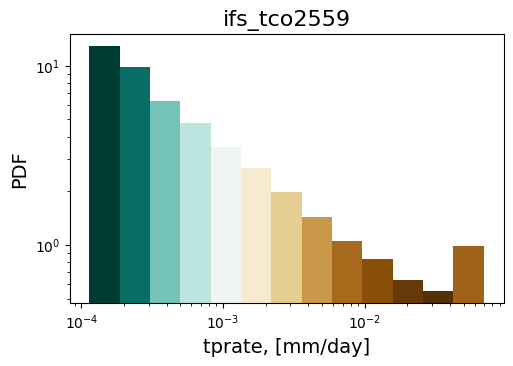

In [30]:
diag.histogram_plot(histograms_logspaced[dataset]['data'], smooth = False, color_map = 'BrBG', figsize=0.7, 
               xlogscale = True, ylogscale=True,  plot_title = histograms_logspaced[dataset]['label'])

### 3.2 Saving the figure in the storage 

{<Axes: title={'center': 'ifs_tco2559'}, xlabel='tprate, [mm/day]', ylabel='PDF'>,
 <Figure size 560x350 with 1 Axes>}

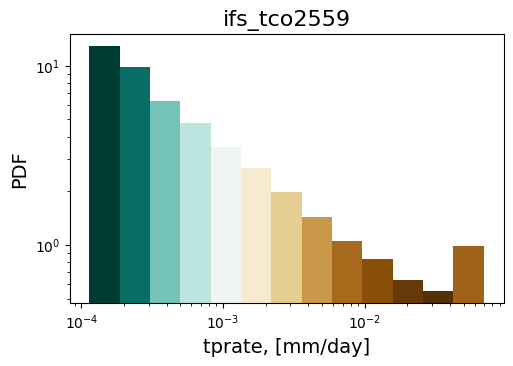

In [31]:
diag.histogram_plot(histograms_logspaced[dataset]['data'], smooth = False, color_map = 'BrBG', figsize=0.7, 
                    xlogscale = True, ylogscale=True,  plot_title = histograms_logspaced[dataset]['label']) #path_to_pdf='./any_path_any_name.png'

### 3.3 Plotting the histogram of counts, frequency, and pdf

##### Histogram of counts (`frequency=False, pdf = False`)

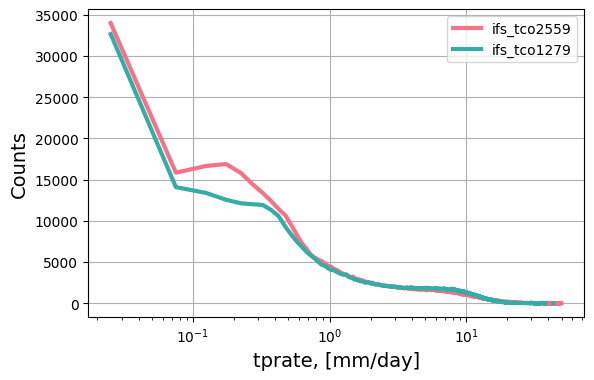

In [32]:
add = None
for key, value in histograms.items():
    add = diag.histogram_plot(value["data"],   add=add, frequency=False, pdf = False, save=False,
                              figsize=0.8, xlogscale=True, ylogscale=False, color=value["color"], 
                              loc = 'upper right',
                              name_of_file= 'lra_comparison', legend=value["label"])

##### Histogram of frequency (`frequency=True, pdf=False`)

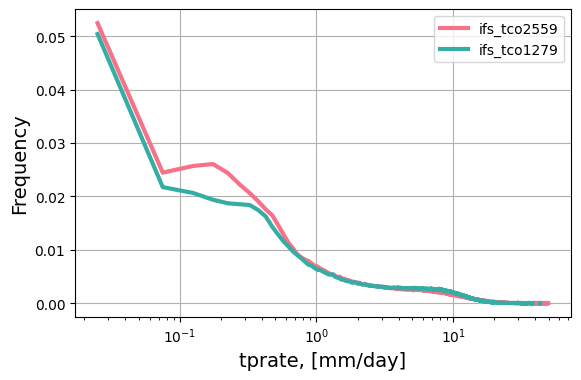

In [33]:
add = None
for key, value in histograms.items():
    add = diag.histogram_plot(value["data"],   add=add,  frequency=True, pdf = False, save=False,
                              figsize=0.8, xlogscale=True, ylogscale=False, color=value["color"], 
                              loc = 'upper right',
                              name_of_file= 'lra_comparison', legend=value["label"])

##### Histogram of pdf (`pdf=True`, also it is a default argument)

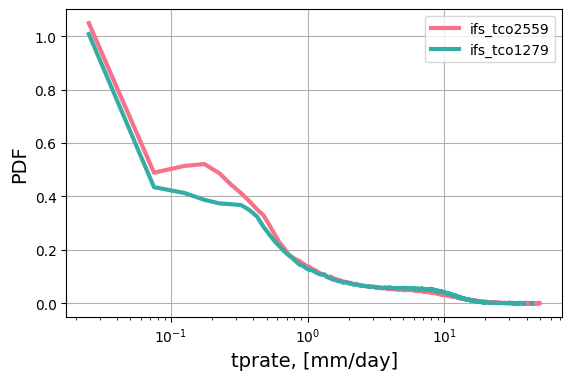

In [34]:
add = None
for key, value in histograms.items():
    add = diag.histogram_plot(value["data"],   add=add, pdf = True, save=False,
                              figsize=0.8, xlogscale=True, ylogscale=False, color=value["color"], 
                              loc = 'upper right',
                              name_of_file= 'lra_comparison', legend=value["label"])

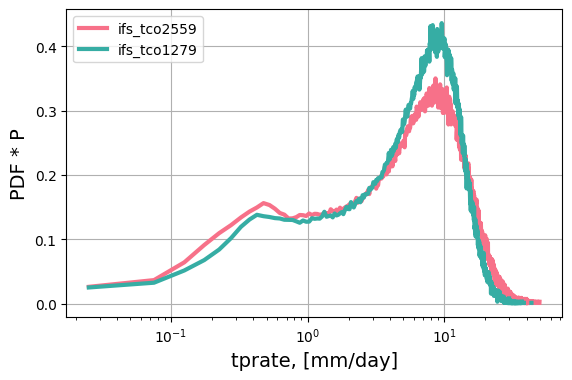

In [36]:
add = None
for key, value in histograms.items():
    add = diag.histogram_plot(value["data"],   add=add, pdfP = True, save=False,
                              figsize=0.8, xlogscale=True, ylogscale=False, color=value["color"], 
                              loc = 'upper left',
                              name_of_file= 'lra_comparison', legend=value["label"])

[Back to the top of file](#structure)

#

##### The end